# Сборный проект. Анализ и предсказание продаж по компьютерным играм.

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Откроем файл с данными и изучим общую информацию

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data_games = pd.read_csv('games.csv', sep = ',')

In [3]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Посмотрим типы данных и кол-во ненулевых значений**

In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть проблемы с типами, проблемы с верхними регистрами, есть пропуски.

Из полученных данных видно, что есть необходимость изменить тип данных в столбцах:
- Year_of_Release -  изменить на Int64, так как год всегда пишут целым числом, формат float в данном случае не подходит. 
- User_Score - изменить на float64

# Шаг 2. Подготовка данных.

### Предобработка данных

#### Поменяем название столбцов,приведем их к нижнему регистру

In [5]:
data_games.columns = data_games.columns.str.lower()

In [6]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Посмотрим пропущенные значения**

In [7]:
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Столбцы 'critic_score' и 'user_score'**
Крупнейшие платформы, освещающие рынок игр, стали появляться во второй половине 90-х (IGN - 1996, Igromania - 1997, Metacritic - 1998). Таким образом, вполне вероятно, что далеко не всем играм, выпущенным до 1996 года, критики ставили оценки. То же самое справедливо и для столбца 'user_score'. Ведь оценки играм пользователям нужно было где-то размещать в сети. Также, так как данные не за полный 2016 год, то и там логично наблюдать пустые значения.

**Столбец 'raiting'**
Крупнейшая негосударственная организация (ESRB), присуждающая рейтинги играм была основана в 1994 году. Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг.

**Посмотрим количество дубликатов**

In [8]:
data_games.duplicated().sum()

0

#### Удалим пропуски где это возможно и необходимо

Удалим пропуски в столбцах name, year_of_release, genre (за их малым количеством):

In [9]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Но сначала посмотрим на таблицу с пустыми значениями в столбце year_of_release

In [10]:
data_games[data_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Возьмем одну из 269 игр с неуказанным годом и проверим, выпускалась ли она на других платформах

In [11]:
data_games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Можно попробовать восполнить пробелы в годах за счет наличия в датасете информации об одних и тех же играх, только выпущенных
для разных платформ (в надежде, что у какой-то из версий игры будет запись о годе, как это оказалось с игрой "Madden NFL 2004")

Удалим пропуски в столбцах name, year_of_release, genre

In [12]:
data_games.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [13]:
# check
data_games.shape[0]

16444

Посмотрим какие есть уникальные значения в столбце user_score

In [14]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратим внимание на аббревиатуру tbd. Отдельно разберем это значение и опишем, как его обработать.

Аббревиатура TBD имеет несколько расшифровок. Нас же интересует игровая сфера. 'To Be Determined' - что означает рейтинг не определен. Т.е. это то же самое, что неизвестное значение. Поэтому, можно смело заменить значение 'tbd' на 'NaN'.

In [15]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan, regex=True)

#### Преобразуем данные в нужные типы

Поменяем в столбце year_of_release тип на Int64, так как год пишут всегда целым числом

In [16]:
data_games['user_score'] = data_games['user_score'].astype(float)

Поменяем тип данных в столбце user_score на float, так как рейтинг логичнее писать именно в этом типе данных

In [17]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')

In [18]:
# check
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [19]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

In [20]:
# check
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


#### Заменим пропуски в столбце rating.

</font><font color='Blue'><b>Комментарий</b></font><br>
Меняю Nan на tbd, что будет означять что рейтинг не определен. 
Рейтинги ESRB дейтвительны в США и Канаде, помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии. Значит данный рейтинг только для США и Канады, в нашей таблице данных больше и для других локаций, поэтому пропуски - это нормально, заменим их на tbd.</b></font><br>

In [21]:
data_games['rating'].fillna('tbd', inplace=True)

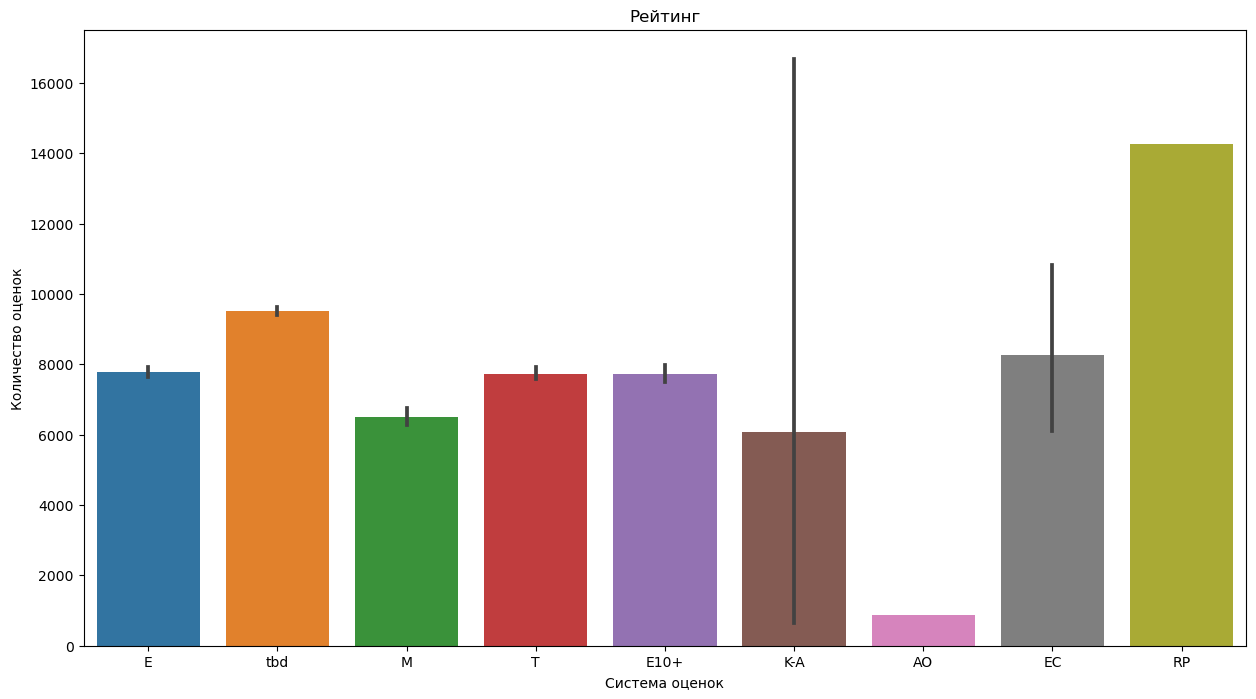

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(y=data_games.index,x=data_games['rating'])
plt.title("Рейтинг")
plt.ylabel("Количество оценок")
plt.xlabel("Система оценок");

In [23]:
# Комментарий ревьюера 3
data_games['rating'].value_counts()

tbd     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

 - M - 16+
 - E - 6+ (для всех)
 - T - 13+ 
 - E10+ - 10+
 - K-A - 10+ (для детей и взрослых)
 - EC - 3+
 - AO - 18+
 - RP - рейтинг ожидается 
 - tbd - рейтинг не определен

**Вывод по предобработке данных.**

Там, где могли, мы заменили пропущенные значения. Что касается остальных пропусков, для их заполнения у нас недостаточно данных. Поэтому, лучше будем работать с меньшим количеством данных но хорошего качества. В остальном же, ошибки в данных устранены. Данные подготовлены к дальнейшему анализу.

In [24]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data_games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

# Шаг 3. Проведем исследовательский анализ данных 

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

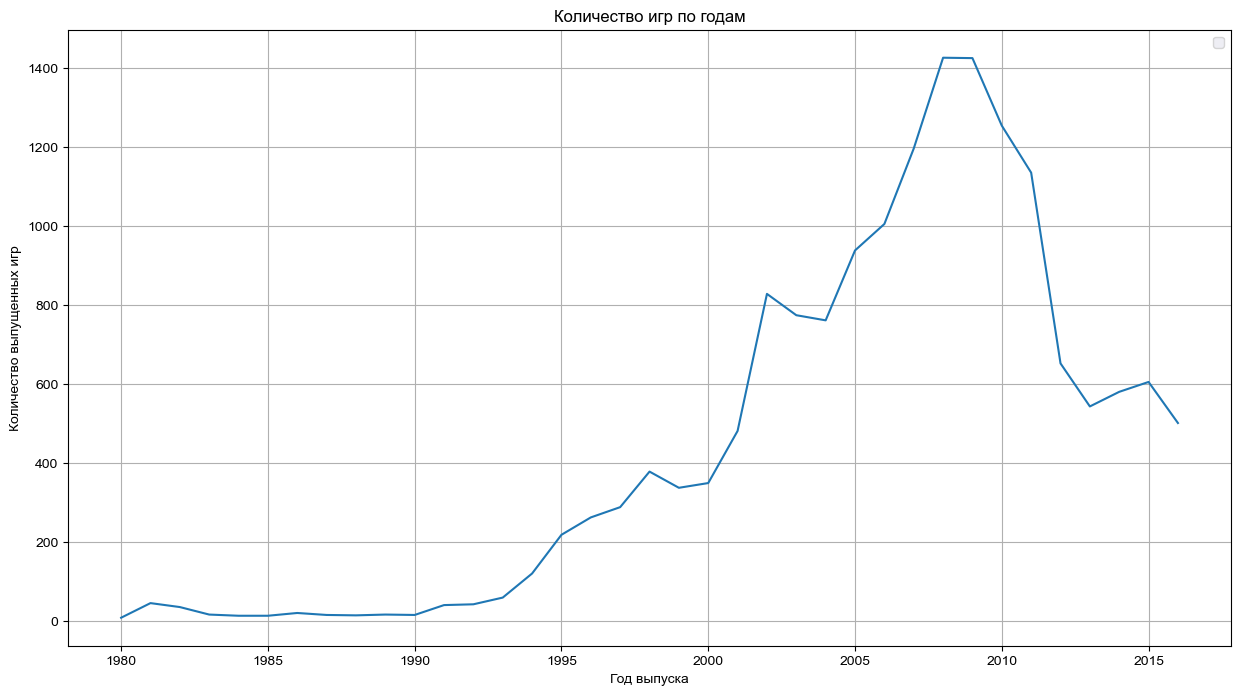

In [25]:
games_by_each_year = (data_games
                      .pivot_table(index='year_of_release', values='name', aggfunc='count')
                      .plot(grid=True, figsize=(15,8)))
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('');

С 1980 годов по 1993 было мало компаний и мало охвата игроков, как и качественных оценок от критиков. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением персонального компьютера (PC), технологий языков программирования, широким внедрением CD-ROM для распространения и хранения данных, распространением операционных систем, таких как Microsoft Windows и Mac OS, основывающихся на GUI. Не последнее место сыграло существенное развитие технологий трехмерной графики. Постепенно набирали популярность игровые приставки, такие как Nintendo, Playstation, позже XBOX. Данный рост стремительно продолжается до 2008-2009 года.

Виден резкий спад консольных игр, начиная с 2009 по 2016гг, думаю это можно обьяснить тем что в середине двухтысячных наступает экспоненциальный рост социальных сетей, которые становятся новым способом общения между людьми. Разработчики игр теперь просто не могут игнорировать браузерную платформу и внутри нее выделяется отдельная платформа и игры под нее. Все это, плюс появление мобильных платформ iOS и Android как раз на рубеже 2008 года, поспособствовало частичной смене акцентов в пользу мобильных приложений и мобильных игр.

#### Иследуем как менялись продажи в зависимости от платформамы

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.


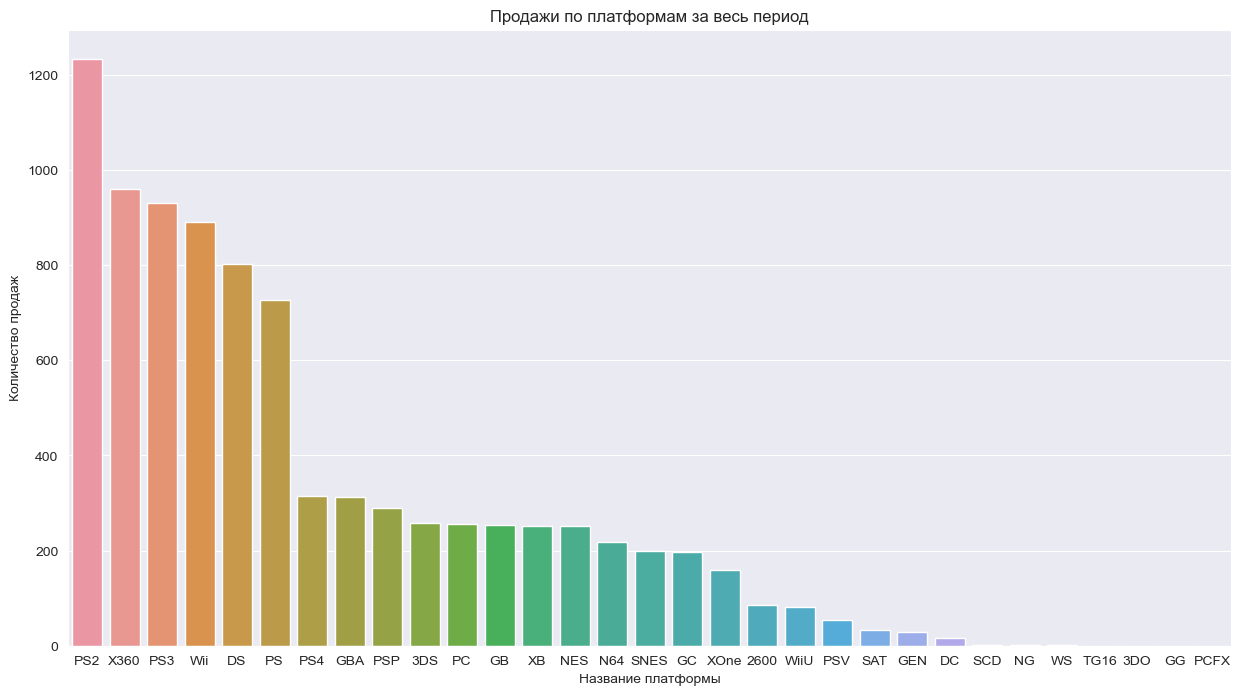

In [26]:
sales_on_platform = (data_games
                     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                     .sort_values(by='total_sales', ascending=False))
plt.figure(figsize=(15,8))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж");

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.


**Составим список всех платформ**

In [27]:
platform_grouped = sales_on_platform.reset_index()
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne',
       '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS',
       'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [28]:
top_platforms = (data_games
    .query('2000 <= year_of_release <= 2015')
    .groupby('platform')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
    .head(10)
)
top_platforms

,total_sales
,sum
platform,
PS2,1233.56
X360,959.72
PS3,927.74
Wii,891.00
DS,802.76
GBA,312.88
PSP,289.53
XB,251.57


In [29]:
platf = (data_games
    .query('platform in @top_platforms.index and 2000 <= year_of_release <= 2015')
    .groupby(['platform','year_of_release'])
    .agg({'total_sales':['sum']})
) 
platf

total_sales
                                 sum
platform year_of_release            
3DS      2011                  63.20
         2012                  51.36
         2013                  56.57
         2014                  43.76
         2015                  27.78
...                              ...
XB       2004                  65.42
         2005                  49.08
         2006                  10.04
         2007                   0.55
         2008                   0.18

[90 rows x 1 columns]

Уберем мультииндекс с годами и посчитаем количество лет жизни платформы за последние 15 лет без выбросов

In [30]:
platf.droplevel(level=1).index.value_counts()

PS2     12
PSP     12
X360    11
DS      10
PS3     10
Wii     10
XB       9
GBA      8
3DS      5
PS4      3
Name: platform, dtype: int64

In [31]:
platf.droplevel(level=1).index.value_counts().mean()

9.0

Мы видим что средний срок жизни платформы 9 лет по данным с 2000 по 2015 год. Но самые актуальные для нас данные после 2008.

#### Определим период, за который нужно взять данные для дальнейшего исследования

Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка
последних годов. Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут.
При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии.


 Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет, включая 2016 год).<br>
Возьмем за иследуемый период с 2013г по 2016г включительно. Так как на графике виден небольшой рост примерно с 2013г по 2015г, небольшой спад в 2016г думаю обусловлен тем, что данные за этот год неполные.   

In [32]:
actual_data_games = data_games[data_games['year_of_release'] > 2012]
actual_data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,tbd,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01


In [33]:
actual_data_games['year_of_release'].unique()

array([2013, 2015, 2014, 2016])

#### Теперь посмотрим данные по топовым платформам именно за интервал с 2013 - 2016

In [34]:
top6_platforms = (actual_data_games
    .groupby('platform')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
    .head(6)
)
top6_platforms

,total_sales
,sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63


In [35]:
(actual_data_games
    .query('2012 <= year_of_release <= 2016 and platform in @top6_platforms.index')
    .pivot_table(index='platform', columns='year_of_release', values='total_sales',aggfunc='sum')
)

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
WiiU,21.65,22.03,16.35,4.60
X360,88.58,34.74,11.96,1.52
XOne,18.96,54.07,60.14,26.15


Мы видим несколько наиболее популярных и актуальных платформ по продажам - PS4, PS3, XOne. У остальных платформ продажи либо совсем в нуле либо на минимумах.

#### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.

In [36]:
actual_data_games.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Отрисуем ящики с усами 

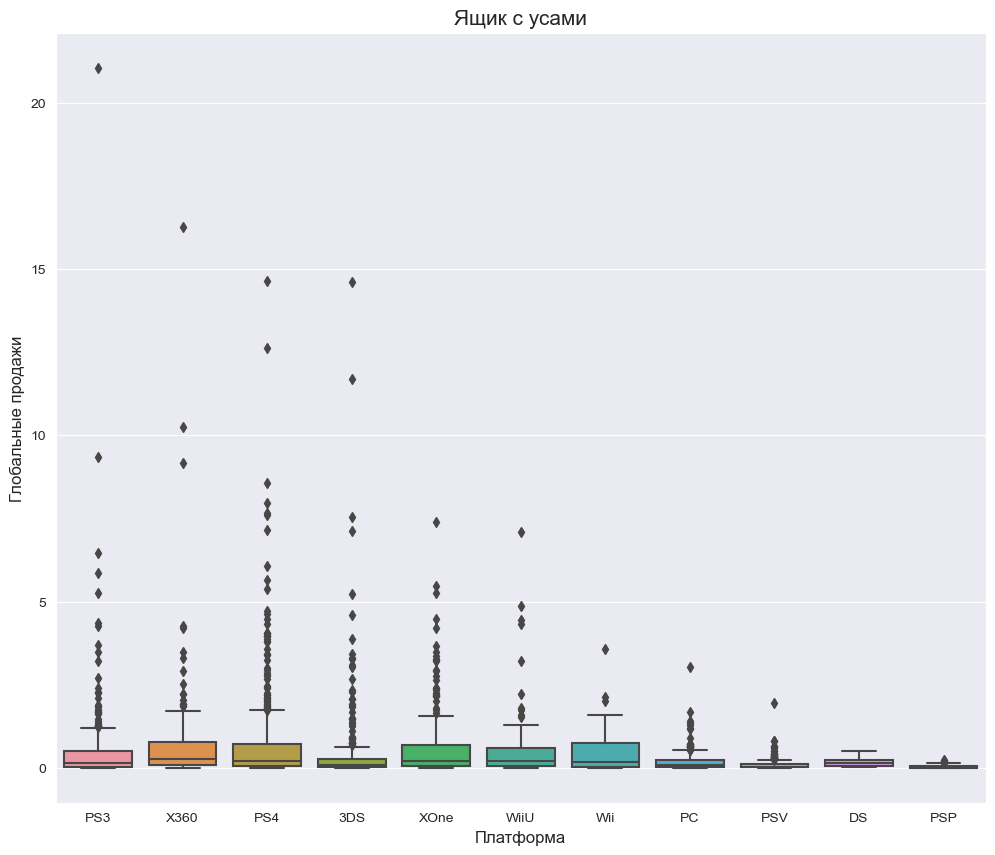

In [37]:
plt.figure(figsize=(12,10))
sns.boxplot(data=actual_data_games, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

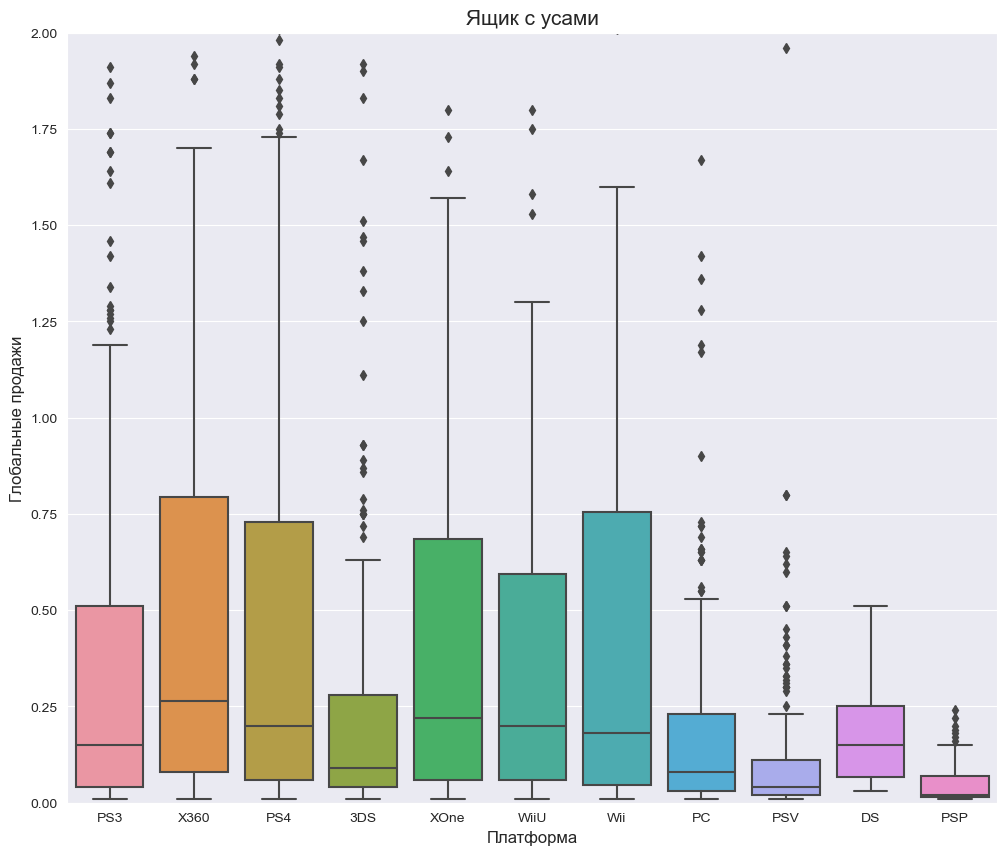

In [38]:
plt.figure(figsize=(12,10))
sns.boxplot(data=actual_data_games, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,2);

Из полученного графика выделим 6 наиболее продаваемых платформ и расмотрим их ближе.

In [39]:
list_of_top_6 = ['PS3', 'X360', 'PS4', 'XOne', 'WiiU',  'Wii']
games_top_6_platforms = actual_data_games[actual_data_games['platform'].isin(['PS3', 'X360', 'PS4', 'XOne', 'WiiU',  'Wii'])]
# games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]

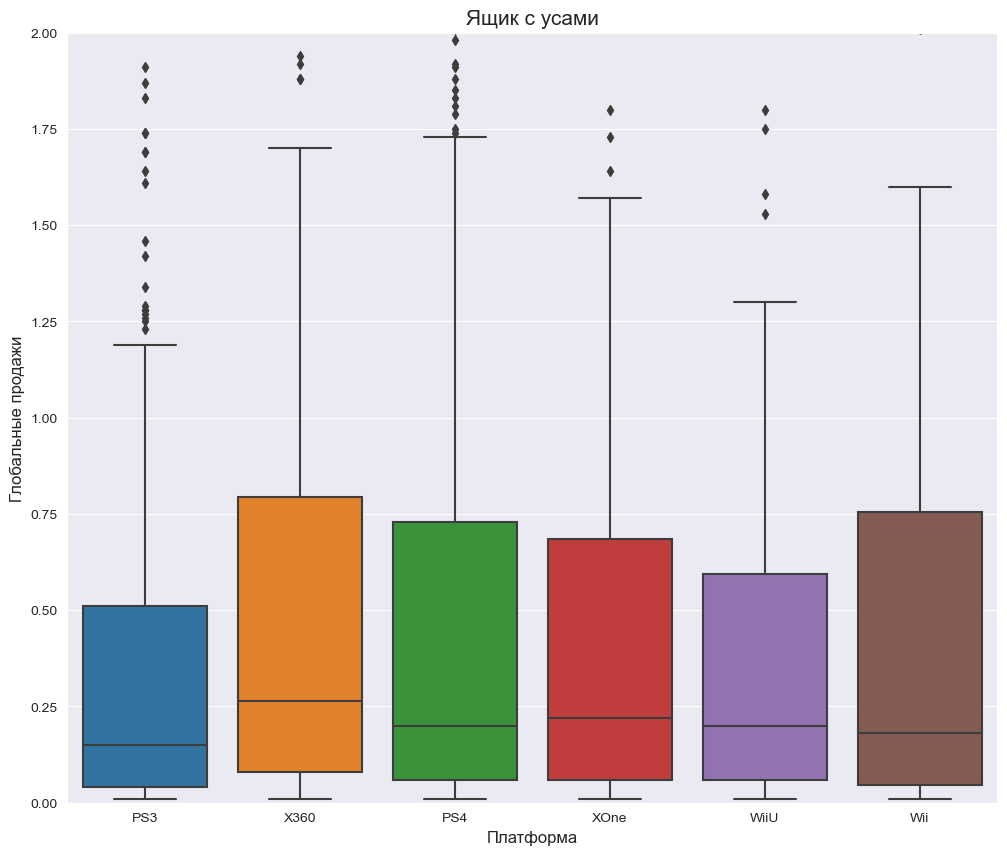

In [40]:
plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_6_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,2);

Продажи на популярных платформах схожи. Медианные значения продаж у X360 находится близко к уровню 0.3. В других платформах таких, как PS4, XOne, WiiU и Wii медианные значения практически одинаковые и близки к уровню 0.2. На платформе PS3 значение медианы продаж близко к 0.1.<br> 
На платформах PS3 и WiiU большая часть проданых игр лежит в диапозоне от 1.2 до 1.3 , на платформах XOne и Wii до 1.5-1.6 , а в лидерах X360 и PS4 до 1.75млн.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

In [41]:
actual_data_games.groupby('platform').sum()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
3DS,610329,38.20,30.96,67.81,6.28,4852.0,558.1,143.25
DS,16104,0.57,0.85,0.00,0.12,0.0,4.8,1.54
PC,380766,11.11,25.36,0.00,2.96,11257.0,971.8,39.43
PS3,694853,63.50,67.81,23.35,26.77,8494.0,1180.8,181.43
PS4,789937,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14
PSP,134887,0.00,0.17,3.29,0.04,74.0,11.7,3.50
PSV,721229,5.04,6.10,18.59,3.26,5516.0,745.2,32.99
Wii,46316,6.56,5.93,0.05,1.12,0.0,36.8,13.66
WiiU,231624,29.21,19.85,10.88,4.69,5015.0,561.4,64.63


In [42]:
list_of_top_5 = ['3DS', 'PS3', 'PS4', 'X360', 'XOne']
games_top_5_platforms = actual_data_games[actual_data_games['platform'].isin(list_of_top_5)]
# games_top_5_platforms = games_top_5_platforms[games_top_5_platforms['total_sales']<1.4]

Построим диаграмму рассеяния.
Посмотрим как влияют на продажи внутри одной популярной платформы, отзывы покупателей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

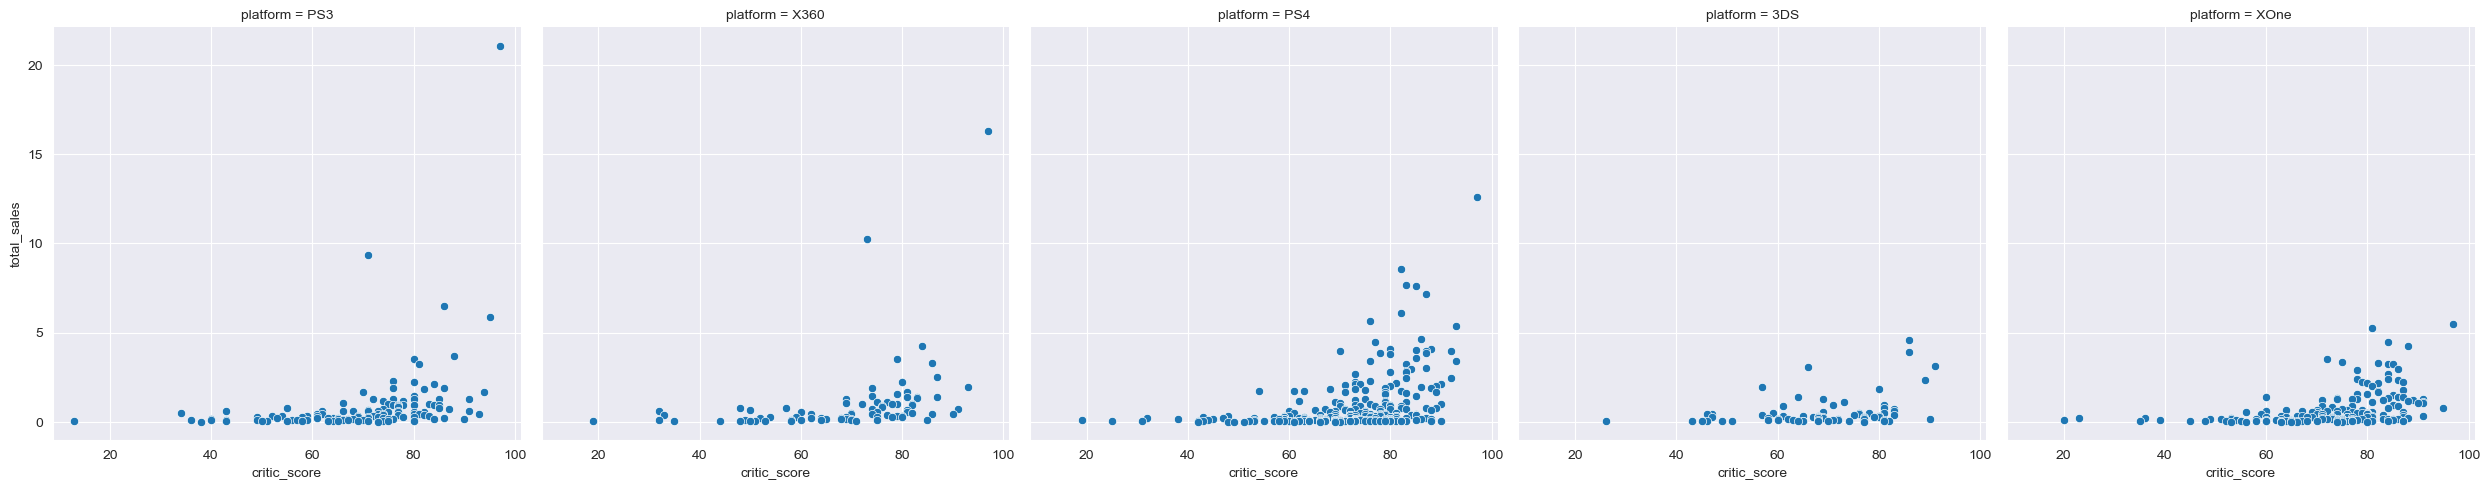

In [43]:
sns.relplot(data = games_top_5_platforms, y= 'total_sales', x= 'critic_score', kind = 'scatter', col= 'platform',);

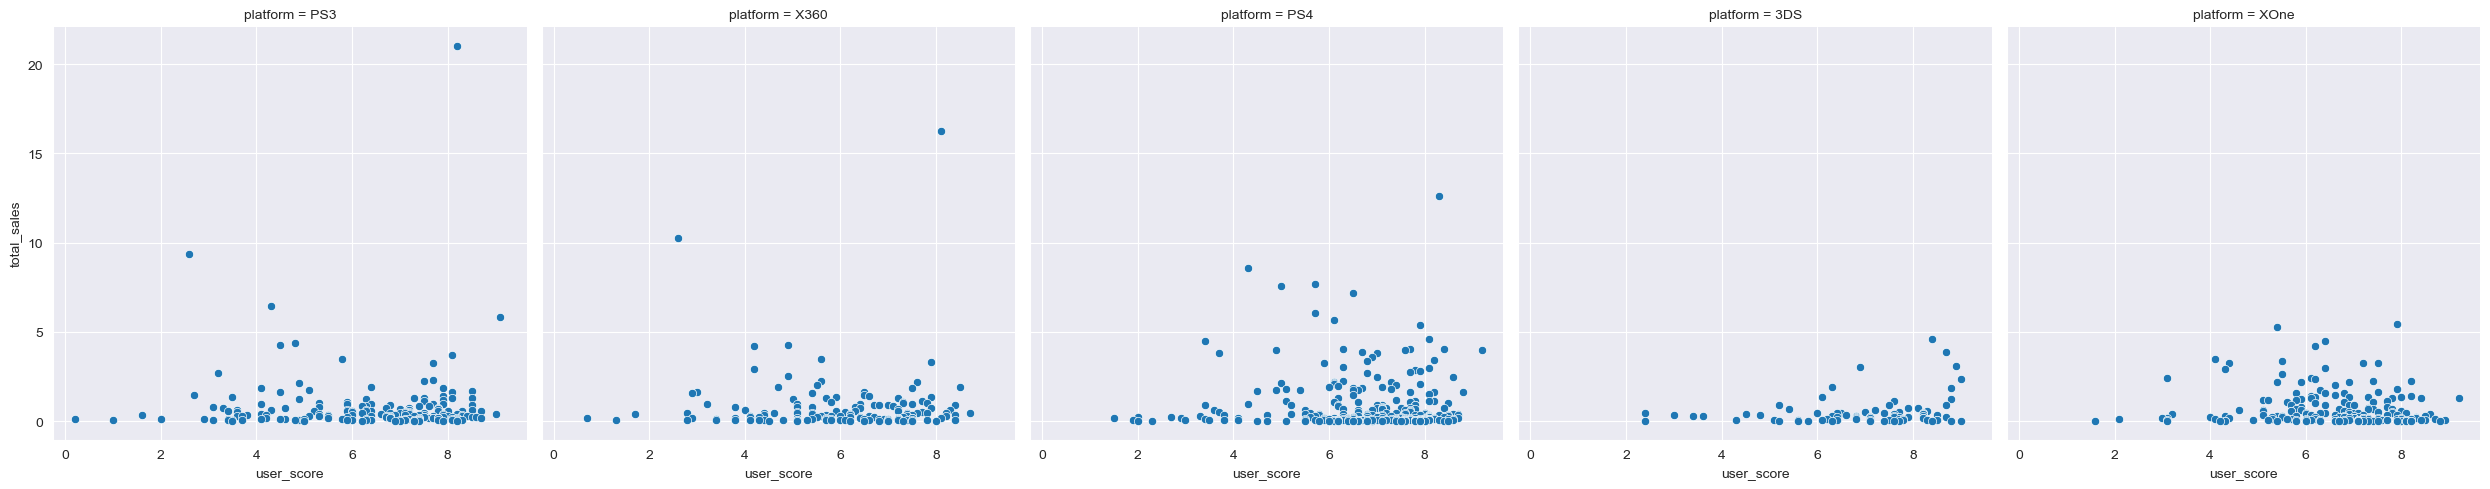

In [44]:
sns.relplot(data = games_top_5_platforms, y= 'total_sales', x= 'user_score', kind = 'scatter', col= 'platform',);

Корреляция между отзывами и продажами.

In [45]:
def corr(games_top_5_platforms,platform):
    print('Корреляция между продажами и оценкой критиков',str(platform),':',games_top_5_platforms.query('platform == @platform')['total_sales']
      .corr(games_top_5_platforms.query('platform == @platform')['critic_score']))
    print('Корреляция между продажами и оценкой пользователей',str(platform),':', games_top_5_platforms.query('platform == @platform')['total_sales']
      .corr(games_top_5_platforms.query('platform == @platform')['user_score']))

In [46]:
corr(actual_data_games,'3DS')

Корреляция между продажами и оценкой критиков 3DS : 0.3570566142288104
Корреляция между продажами и оценкой пользователей 3DS : 0.24150411773563002


In [47]:
corr(actual_data_games,'PS3')

Корреляция между продажами и оценкой критиков PS3 : 0.33428533933719184
Корреляция между продажами и оценкой пользователей PS3 : 0.0023944027357567033


In [48]:
corr(actual_data_games,'PS4')

Корреляция между продажами и оценкой критиков PS4 : 0.40656790206178123
Корреляция между продажами и оценкой пользователей PS4 : -0.03195711020455643


In [49]:
corr(actual_data_games,'X360')

Корреляция между продажами и оценкой критиков X360 : 0.3503445460228664
Корреляция между продажами и оценкой пользователей X360 : -0.011742185147181334


In [50]:
corr(actual_data_games,'XOne')

Корреляция между продажами и оценкой критиков XOne : 0.41699832800840153
Корреляция между продажами и оценкой пользователей XOne : -0.06892505328279418


Для X360, PS3, XOne, PS4 есть прямая корреляция с отзывами критиков и отсутствие корреляции для отзывов покупателей.<br>
Для 3DS есть прямая корреляция с отзывами критиков и отзывами покупателей.<br>
Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. 

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [51]:
# Комментарий ревьюера
temp1, temp2 = games_top_6_platforms.total_sales.sum(), actual_data_games.total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(869.98, 1090.69, 20.24)

In [52]:
distr_genre = actual_data_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу

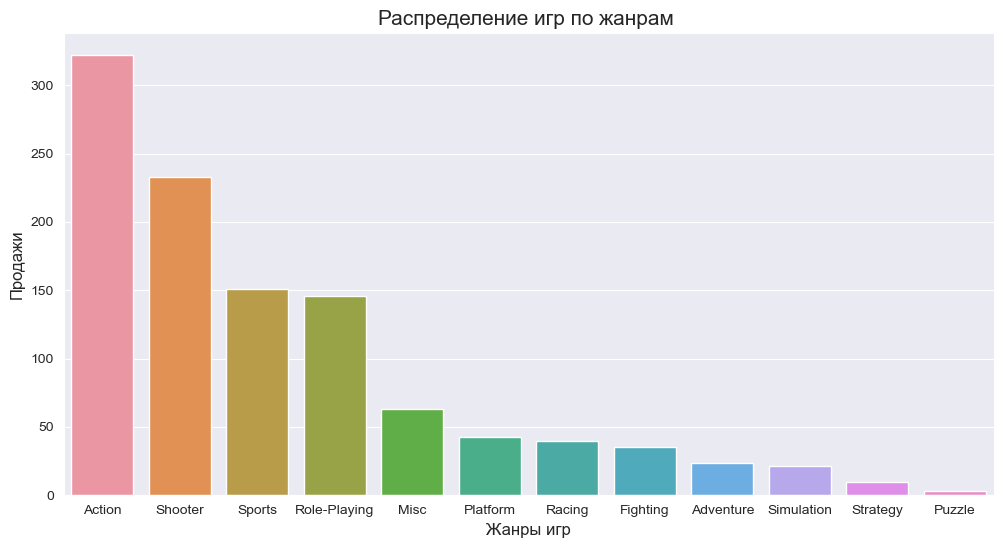

In [53]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Самый популярный жанр Action, далее можно выделить тройку средних это - Shooter, Sports, Role-Playing.<br>
Самыми не популярными жанрами оказались Strategy и Puzzle. Но не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр.

In [54]:
actual_data_games.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


In [55]:
median_genre = actual_data_games.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
median_genre

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


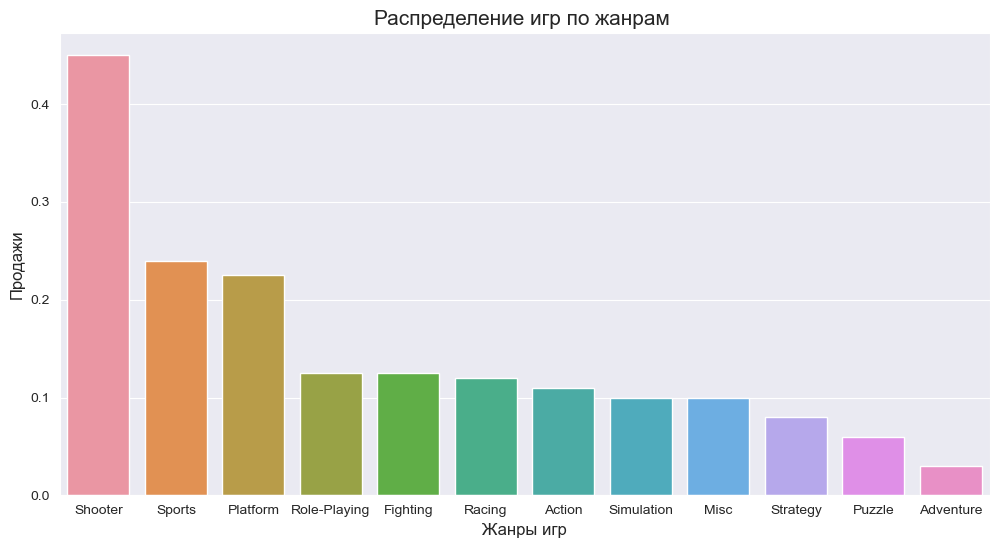

In [56]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=median_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Добавив сравнение медианных продаж, получили иной график, более устойчивый и правдоподобный. Исходя из полученных данных видно что наиболее прибыльный жанр это Shooter. Далее практически на одном уровне расположились два жанра это Sports и Platform. 

**Вывод по исследовательскому анализу данных:**
* Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008-2009 года. После 2009  произошел резкий спад разработок игр на игровые платформы, возможно это связано с тем что стало появляться все больше игр на мообильные устройства. 
* Самые популярные игровые платформы за весь период : PS4, PS3, XOne.
* Средняя жизнь игровой платформы составляет 9 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
* Больше всего было продано игр на X360 и WiiU.
* У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
* Самый популярный жанр за актуальный период: Shooter. Самый не популярный Puzzle и Adventure.

# Шаг 4. Портрет пользователя

### Составим портрет пользователя каждого региона


Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), жанры (топ-5), влияние рейтинга ESRB на продажи.

In [57]:
actual_data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,tbd,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,tbd,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,tbd,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


**Портрет пользователя Северной Америки**

sum_sales    385.22
dtype: float64
          sum_sales
platform           
PS4          108.74
XOne          93.12
X360          81.66
PS3           63.50
3DS           38.20


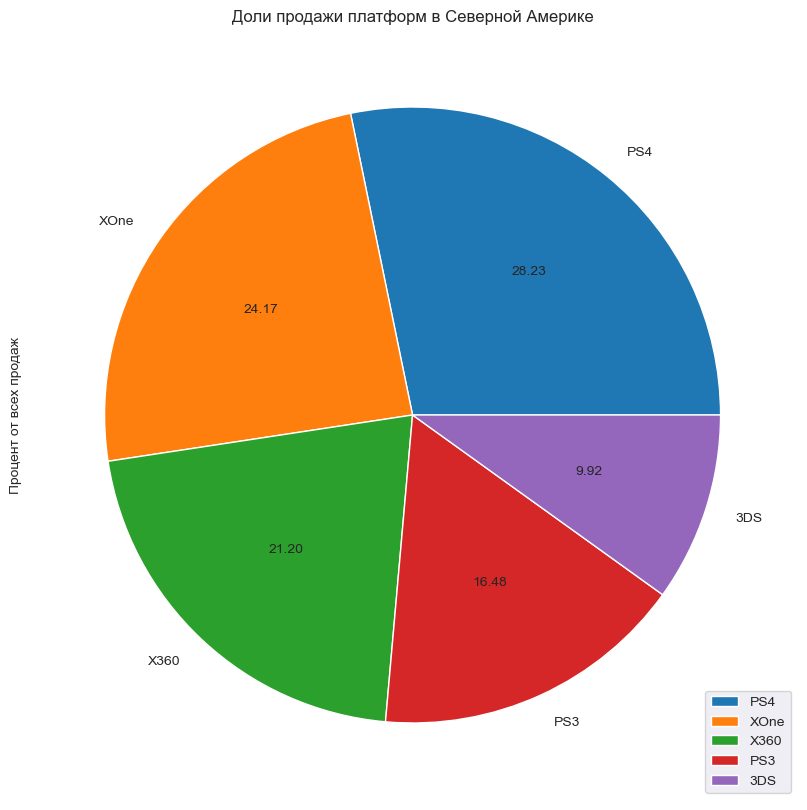

In [58]:
platforms = (actual_data_games
    .groupby('platform')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)


platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в Северной Америке')
plt.ylabel('Процент от всех продаж');

sum_sales    374.95
dtype: float64
              sum_sales
genre                  
Action           126.05
Shooter          109.74
Sports            65.27
Role-Playing      46.40
Misc              27.49


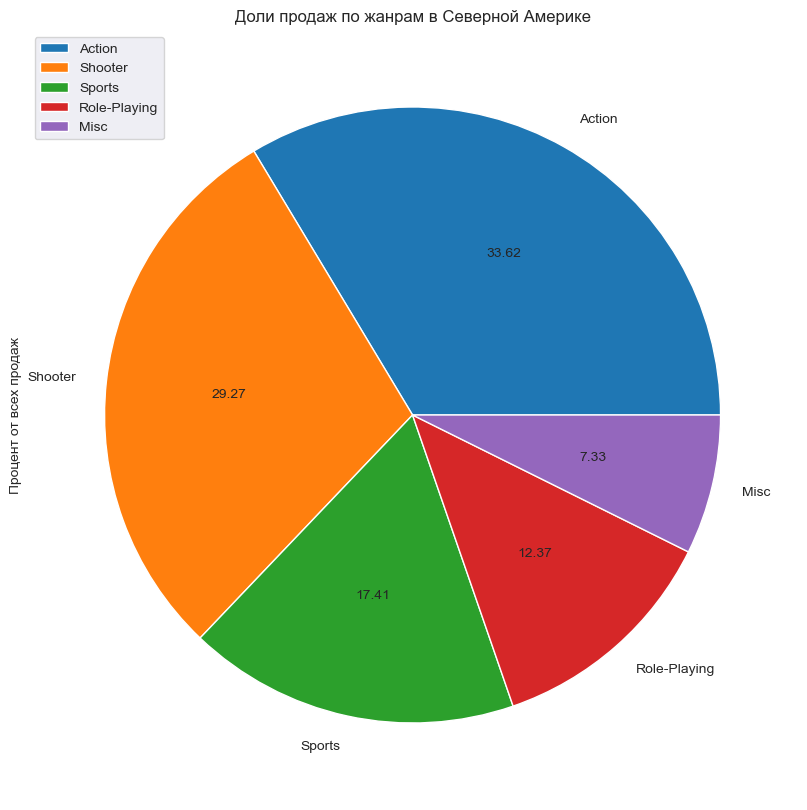

In [59]:
genres = (actual_data_games
    .groupby('genre')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)


genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по жанрам в Северной Америке')
plt.ylabel('Процент от всех продаж');

sum_sales    437.71
dtype: float64
        sum_sales
rating           
M          165.21
tbd         89.42
E           79.05
E10+        54.24
T           49.79


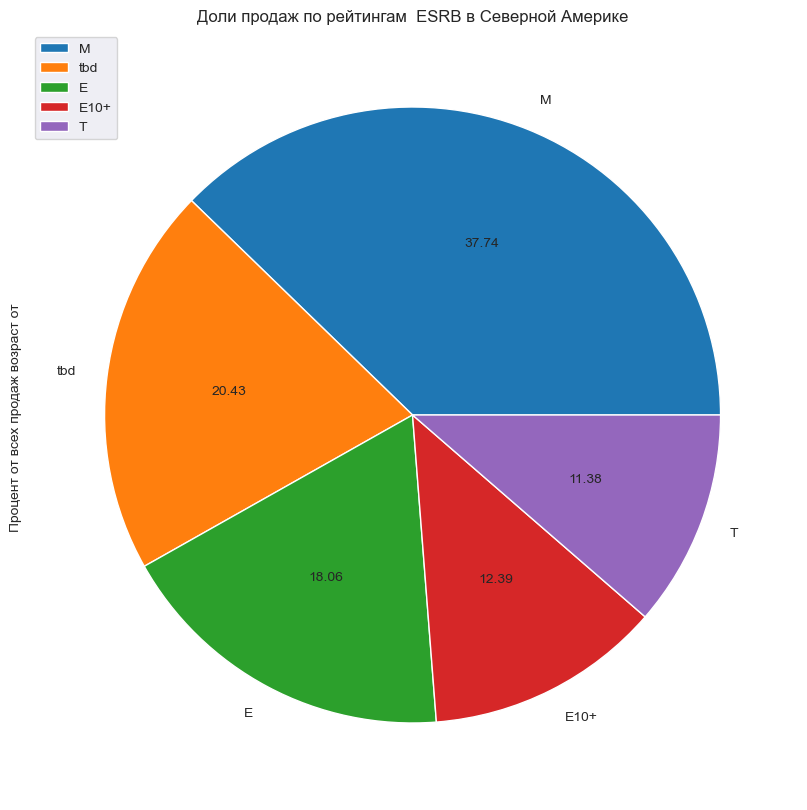

In [60]:
ratings = (actual_data_games
    .groupby('rating')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по рейтингам  ESRB в Северной Америке')
plt.ylabel('Процент от всех продаж возраст от ');

**Вывод:**
- Самые популярные игровые платформы в северной америке за все время это: PS4 (лидер продаж), XOne, X360, PS3, 3DS.
- Топ 5 жанров в северной америке за все время: action и shooter лидеры продаж. Далее sports, Role-Playing, misc.
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом M - 16. Очень много данных у нас с неразмеченными рейтингами, что намного усложняет анализ продаж. Далее у нас игры с рейтингом "для всех" и на третьем месте игры с рейтингом "от 10 и выше"

**Портрет пользователя в Европе**

sum_sales    333.97
dtype: float64
          sum_sales
platform           
PS4          141.09
PS3           67.81
XOne          51.59
X360          42.52
3DS           30.96


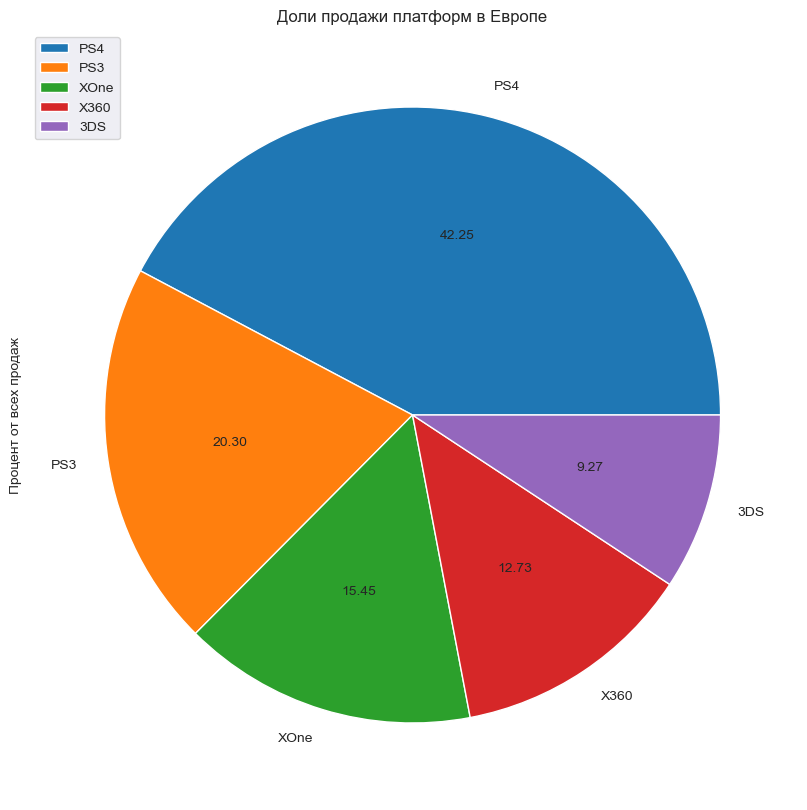

In [61]:
platforms = (actual_data_games
    .groupby('platform')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)


platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в Европе')
plt.ylabel('Процент от всех продаж');

sum_sales    323.67
dtype: float64
              sum_sales
genre                  
Action           118.13
Shooter           87.86
Sports            60.52
Role-Playing      36.97
Racing            20.19


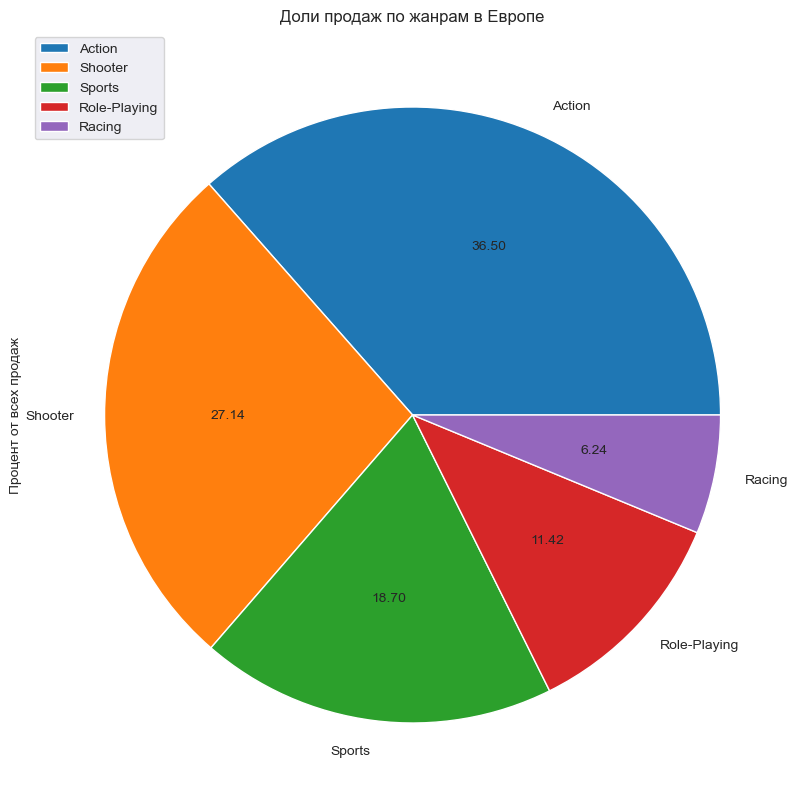

In [62]:
genres = (actual_data_games
    .groupby('genre')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)


genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по жанрам в Европе')
plt.ylabel('Процент от всех продаж');

sum_sales    392.23
dtype: float64
        sum_sales
rating           
M          145.32
E           83.36
tbd         78.91
E10+        42.69
T           41.95


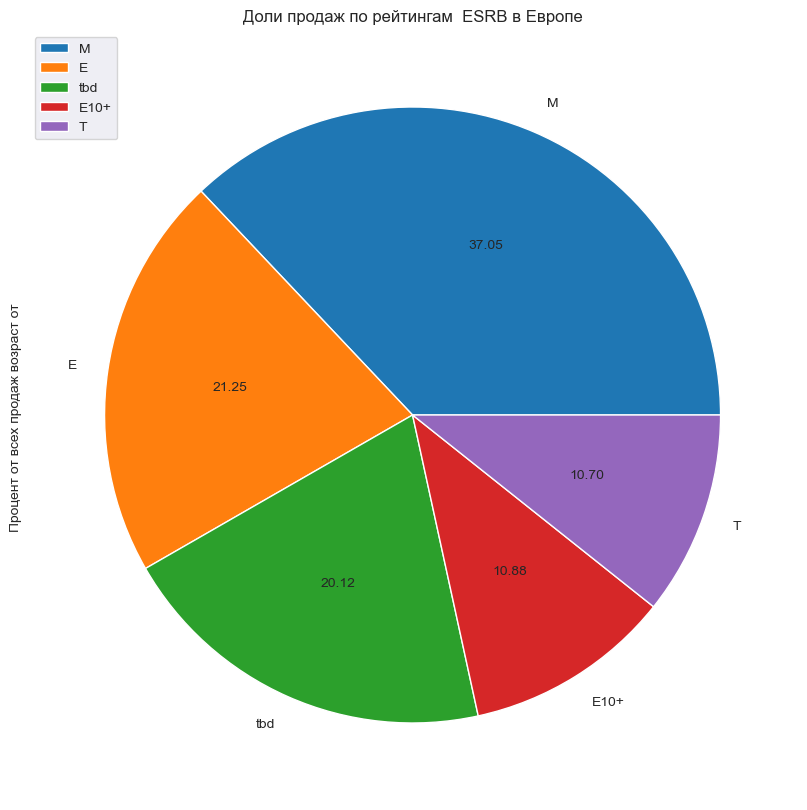

In [63]:
ratings = (actual_data_games
    .groupby('rating')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по рейтингам  ESRB в Европе')
plt.ylabel('Процент от всех продаж возраст от ');

**Вывод:**
- Самые популярные игровые платформы в Европе это: PS4 (лидер продаж), PS3, XOne, X360, 3DS.
- Топ 5 жанров в Европе : action(лидер продаж), shooter, sports, Role-Playing, racing.
- По рейтингам видно, что больше всего продаж у игр с рейтингом М-16+, на втором месте игры с рейтингом "для всех" и далее игры с рейтингом "от 10 и выше". Так же 20% с неопределенным рейтингом.


**Портрет пользователя Japanese**

sum_sales    136.59
dtype: float64
          sum_sales
platform           
3DS           67.81
PS3           23.35
PSV           18.59
PS4           15.96
WiiU          10.88


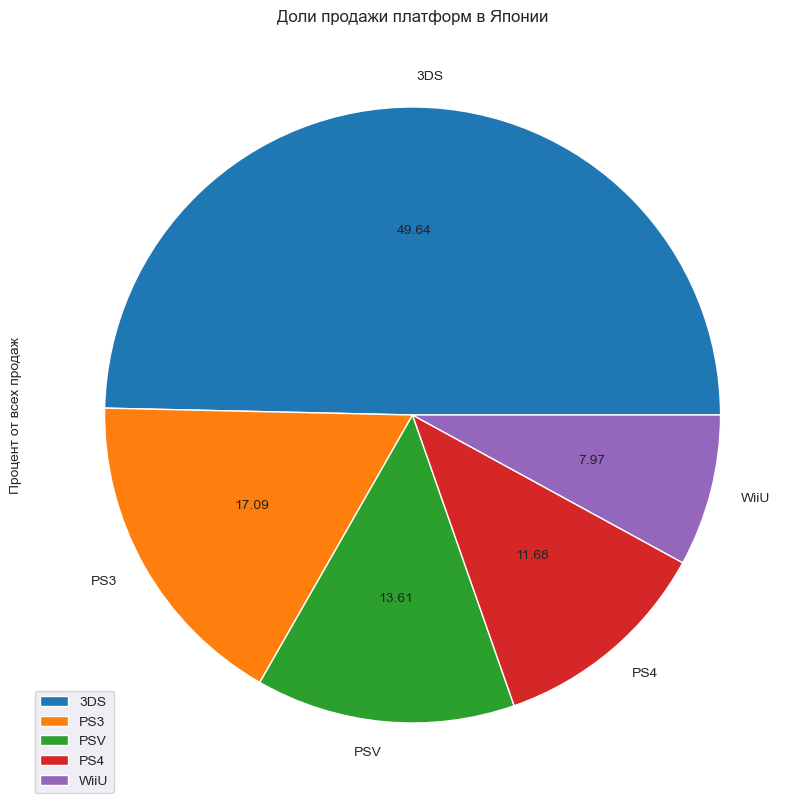

In [64]:
platforms = (actual_data_games
    .groupby('platform')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)


platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в Японии')
plt.ylabel('Процент от всех продаж');

sum_sales    114.99
dtype: float64
              sum_sales
genre                  
Role-Playing      51.04
Action            40.49
Misc               9.20
Fighting           7.65
Shooter            6.61


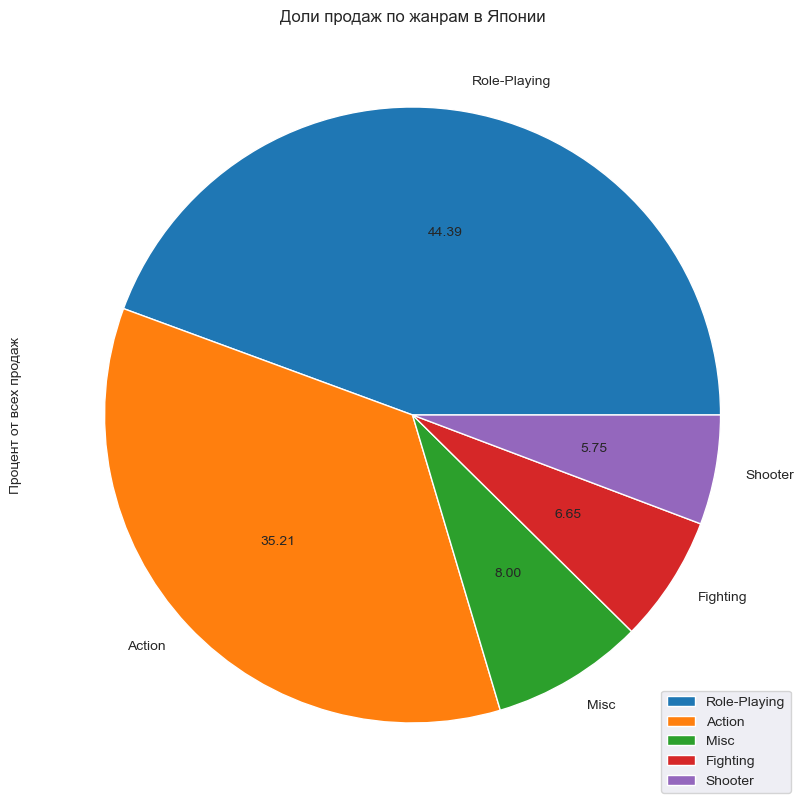

In [65]:
genres = (actual_data_games
    .groupby('genre')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)


genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по жанрам в Японии')
plt.ylabel('Процент от всех продаж');

sum_sales    140.78
dtype: float64
        sum_sales
rating           
tbd         85.05
T           20.59
E           15.14
M           14.11
E10+         5.89


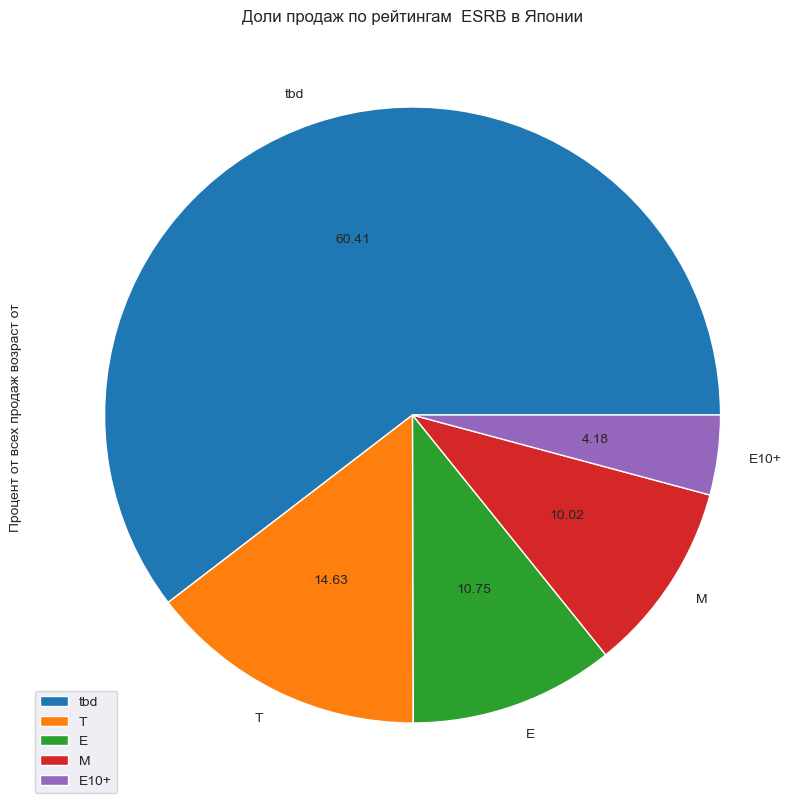

In [66]:
ratings = (actual_data_games
    .groupby('rating')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .head(5)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по рейтингам  ESRB в Японии')
plt.ylabel('Процент от всех продаж возраст от ');

**Вывод:**
- Самые популярные игровые платформы в Японии это: 3DS (лидер продаж), PS3, PSV, PS4, WiiU
- Топ 5 жанров в Японии : Role-Playing и action самые популярные, далее идут sports, misc, Fighting, Shooter. 
- По рейтингам видно, что 60% не установленного рейтинга, это обусловленно тем, что в Японии другая рейтинговая система оценок. Рейтинги ESRB дейтвительны в основном США и Канаде, поэтому такой большой процент не установленного рейтинга. Далее иду игры с рейтингом Т-13+, так же игры с рейтингом "для всех" и далее игры с рейтингом "от 16 и выше".

**Вывод по составлению портрета пользователя каждого региона**

Мы видим, что портрет пользователей в Северной Америки и Европе почти не отличается. У Японцев немного отличается интерес по платформам и они больше предпочитают ролевый игры, думаю это связанно с большим развитием технологий и популярным в стране киберспортом. Возрастной рейтинг Японского пользователя отличается тем что большая часть рейтинга не определенна, если смотреть  по ERSB то он наиболее сконцентрирован на молодом и среднем возрастном сегменте от 6 и от 13 лет.Тогда как в Европе и Северной Америке основную долю занимают игры с рейтингом 16+.

# Шаг 5. Проведем исследование статистических показателей.

### Проверка гипотез

1 гипотеза:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2 гипотеза:

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу что средние пользовательские рейтинги платформ Xbox One и PC одинаковые c альфа = 5%. Сформируем сначала нулевую гипотезу для равенства двух генеральных совокупностей и если она не опровергнется, дальше попробуем опровергнуть альтернативную гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC разные.

In [67]:
XOne = actual_data_games[(actual_data_games['platform'] == 'XOne') &  (actual_data_games['user_score'] > 0)]['user_score']
PC = actual_data_games[(actual_data_games['platform'] == 'PC') &  (actual_data_games['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.52142857142857
Средний пользовательский рейтинг платформы PC 6.269677419354836


Посмотрим и сравним дисперсию двух выборок, если она отличаеться более чем на 10% тогда в Т-тесте зададим параметр, equal_var = False(по умолчанию True) и дисперсия будет оценена для каждый выборки по отдельности, а не общей.

In [68]:
print(XOne.var())
print(PC.var())

1.9069968429360702
3.035892752408884


H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

Проверяем первую гипотезу

In [69]:
alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


У нас не получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся, опровергнуть ее у нас не получилось.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [70]:
Action = actual_data_games[(actual_data_games['genre'] == 'Action') &  (actual_data_games['user_score'] > 0)]['user_score']
Sports = actual_data_games[(actual_data_games['genre'] == 'Sports') &  (actual_data_games['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676097
Средний пользовательский рейтинг жанра Sports 5.238124999999999


Проверяем вторую гипотезу

In [71]:
alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Получив p-value, мы отвергли нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинаковые средние рейнтинги по двум жанрам.

На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

**Проверили гипотезы:**
- Гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

# Шаг 6. Общий вывод

### Вывод:

**Мы исследовали данные и сделали выводы:**
- С 1980 годов по 1993 было мало компаний и мало охвата игроков, как и качественных оценок от критиков. Игровые приставки постепенно набирали популярность рост стремительно продолжается до 2008-2009 года. Виден резкий спад консольных игр, начиная с 2009 по 2016г.
- Выяснили что самые продаваемые игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS. 
- Самые продоваемые игровые платформы за период с 2013-1016гг. это  X360 и PS4.
- Средний срок жизни платформы 9 лет по данным с 2000 по 2015 год. Самый пик продаж наступает примерно через 5 лет после выпуска консоли. 
- У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли.
- Самый популярный жанр за актуальный период: Shooter. Самый не популярный Puzzle и Adventure. 

**Портрет пользователя:**<br>
<br>
Протрет пользователя в Северной Америке:
- Топ 5 платформ в Северной Америке за период 2013-2016 год это: PS4 (лидер продаж), XOne, X360, PS3, 3DS.
- Топ 5 жанров в Северной Америке за все время:  action и shooter лидеры продаж. Далее sports, Role-Playing, misc.
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом M - 16. Очень много данных у нас с неразмеченными рейтингами, что намного усложняет анализ продаж. Далее у нас игры с рейтингом "для всех" и на третьем месте игры с рейтингом "от 10 и выше".

Протрет пользователя в Европе:
- Самые популярные игровые платформы в Европе за актуальный период это: PS4 (лидер продаж), PS3, XOne, X360, 3DS.
- Топ 5 жанров в Европе за актуальный период: action(лидер продаж), shooter, sports, Role-Playing, racing.
- По рейтингам видно, что больше всего продаж у игр с рейтингом М-16+, на втором месте игры с рейтингом "для всех" и далее игры с рейтингом "от 10 и выше". Так же 20% с неопределенным рейтингом.

Протрет пользователя в Японии:
- Самые популярные игровые платформы в Японии за актуальный период это: 3DS (лидер продаж), PS3, PSV, PS4, WiiU.
- Топ 5 жанров в Японии за все время: Role-Playing и action самые популярные, далее идут sports, misc, Fighting, Shooter.
- По рейтингам видно, что 60% не установленного рейтинга, это обусловленно тем, что в Японии другая рейтинговая система оценок. Рейтинги ESRB дейтвительны в основном США и Канаде, поэтому такой большой процент не установленного рейтинга. Далее иду игры с рейтингом Т-13+, так же игры с рейтингом "для всех" и далее игры с рейтингом "от 16 и выше".<br>
Портрет пользователей в Северной Америки и Европе почти не отличается. У Японцев немного отличается интерес по платформам и они больше предпочитают ролевый игры. Система определения рейтинга в Японии отличается от Европейской.

**Проверили гипотезы:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
У нас не получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся, опровергнуть ее у нас не получилось.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br>
У нас получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно делать какие либо выводы по данным от разных жанров мы не можем.

**Компании более выгодно акцентировать продажи на:**
- Северную Америку и Европу
- Наиболее подходящая платформа для этого региона PS4
- жанры: Action и Shooter
- рейтинг ESRB от 6+ лет и от 15+

Продукт удовлетворяющий этим критериям охватит наибольшую аудиторию и получит большой спрос.

